# CBRAIN-CAM online run analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [128]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import *
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML, FileLink

In [3]:
FIG_DIR = './figures/'
TMP_DIR = '/beegfs/DATA/pritchard/srasp/tmp/'

In [4]:
def save_tmp(name, obj):
    with open(f'{TMP_DIR}{name}.pkl', 'wb') as f:
        pickle.dump(obj, f)
def load_tmp(name):
    with open(f'{TMP_DIR}{name}.pkl', 'rb') as f:
        obj = pickle.load(f)
    return obj

In [162]:
DATA_DIR = '/beegfs/DATA/pritchard/srasp/'
%ls {DATA_DIR}

nnatmonly_fbp8_D002_andkua/                   nonsp_3k/
nnatmonly_fbp8_D003_andkua/                   nonsp_3kw1/
nnatmonly_fbp8_D004_3kw1_allfix/              nonsp_4k/
nnatmonly_fbp8_D004_4k_allfix/                nonsp_andkua/
nnatmonly_fbp8_D004_andkua_allfix/            old_3kw1/
nnatmonly_fbp8_D004_andkua_allfix_betafix25/  old_data/
nnatmonly_fbp8_D004_andkua_allfix_betafix5/   preprocessed_data/
nnatmonly_fbp8_D004_andkua_msefix/            sp32fbp_andkua/
nnatmonly_fbp8_D004_andkua_nofix/             sp8fbp_1k/
nnatmonly_fbp8_D004_andkua_qfix/              sp8fbp_2k/
nnatmonly_fbp8_D005_andkua_nofix/             sp8fbp_3k/
nnatmonly_fbp8_H001_andkua_allfix/            sp8fbp_3kw1/
nnatmonly_fbp8_N001_andkua_allfix/            sp8fbp_4k/
nnatmonly_fbp8_N002_andkua_allfix/            sp8fbp_4k_fullout/
nnfullphy_fbp32_E002_andkua/                  sp8fbp_andkua/
nnfullphy_fbp8_E001_andkua/                   sp8fbp_andkua_nobeta/
nnfullphy_std8_A003/                          tmp/

In [193]:
exps_ak = ['sp8fbp_andkua', 'nnatmonly_fbp8_D004_andkua_allfix_betafix35', 'nonsp_andkua']
exps_betafix = ['nnatmonly_fbp8_D004_andkua_allfix', 'nnatmonly_fbp8_D004_andkua_allfix_betafix25', 
                'nnatmonly_fbp8_D004_andkua_allfix_betafix35',  'nnatmonly_fbp8_D004_andkua_allfix_betafix5']
exps_1k = ['sp8fbp_1k', 'nnatmonly_fbp8_D004_1k_allfix_betafix35', 'nonsp_1k']
exps_2k = ['sp8fbp_2k', 'nnatmonly_fbp8_D004_2k_allfix_betafix35', 'nonsp_2k']
exps_3k = ['sp8fbp_3k', 'nnatmonly_fbp8_D004_3k_allfix_betafix35', 'nonsp_3k']
exps_4k = ['sp8fbp_4k', 'nnatmonly_fbp8_D004_4k_allfix_betafix35', 'nonsp_4k']
#exps_ak_nobeta = ['sp8fbp_andkua_nobeta', 'nnatmonly_fbp8_N002_andkua_allfix', 'nnatmonly_fbp8_N001_andkua_allfix']
exps_3kw1 = ['sp8fbp_3kw1', 'nnatmonly_fbp8_D004_3kw1_allfix', 'nonsp_3kw1']
#exps = exps_ak + exps_betafix + exps_3kw1 + exps_1k + exps_2k + exps_3k +exps_4k
exps = exps_ak + exps_betafix + exps_1k + exps_2k + exps_3k + exps_4k

In [172]:
# Check which of the data above is not available
for e in exps_4k:
    print(e)
    print(sorted(glob(f'{DATA_DIR}{e}/*.h0.0000-*'))[:1])
    print(sorted(glob(f'{DATA_DIR}{e}/*.h1.0000-*'))[:1])
    print(sorted(glob(f'{DATA_DIR}{e}/*.h2.0000-*'))[:1])
    print(sorted(glob(f'{DATA_DIR}{e}/*.h0.0001-*'))[:1])
    print(sorted(glob(f'{DATA_DIR}{e}/*.h1.0001-*'))[:1])
    print(sorted(glob(f'{DATA_DIR}{e}/*.h2.0001-*'))[:1])

sp8fbp_4k
['/beegfs/DATA/pritchard/srasp/sp8fbp_4k/sp8fbp_4k.cam2.h0.0000-01.nc']
['/beegfs/DATA/pritchard/srasp/sp8fbp_4k/sp8fbp_4k.cam2.h1.0000-01-01-00000.nc']
['/beegfs/DATA/pritchard/srasp/sp8fbp_4k/sp8fbp_4k.cam2.h2.0000-01-01-00000.nc']
['/beegfs/DATA/pritchard/srasp/sp8fbp_4k/sp8fbp_4k.cam2.h0.0001-01.nc']
['/beegfs/DATA/pritchard/srasp/sp8fbp_4k/sp8fbp_4k.cam2.h1.0001-01-06-00000.nc']
['/beegfs/DATA/pritchard/srasp/sp8fbp_4k/sp8fbp_4k.cam2.h2.0001-01-01-00000.nc']
nnatmonly_fbp8_D004_4k_allfix
['/beegfs/DATA/pritchard/srasp/nnatmonly_fbp8_D004_4k_allfix/nnatmonly_fbp8_D004_4k_af.cam2.h0.0000-01.nc']
['/beegfs/DATA/pritchard/srasp/nnatmonly_fbp8_D004_4k_allfix/nnatmonly_fbp8_D004_4k_af.cam2.h1.0000-01-01-00000.nc']
[]
['/beegfs/DATA/pritchard/srasp/nnatmonly_fbp8_D004_4k_allfix/nnatmonly_fbp8_D004_4k_af.cam2.h0.0001-01.nc']
['/beegfs/DATA/pritchard/srasp/nnatmonly_fbp8_D004_4k_allfix/nnatmonly_fbp8_D004_4k_af.cam2.h1.0001-01-06-00000.nc']
[]
nonsp_4k
['/beegfs/DATA/pritchard/sr

In [194]:
%%time
year = '0'
h0s = {e : xr.open_mfdataset(f'{DATA_DIR}{e}/*.h0.000{year}-*', decode_times=False) for e in list(set(exps))}
save_tmp('saved_h0s', h0s)

OSError: no files to open

In [176]:
h0s = load_tmp('saved_h0s')

In [ ]:
h1s = {e : xr.open_mfdataset(f'{DATA_DIR}{e}/*.h1.000{year}-*', decode_times=False) for e in list(set(exps))}
save_tmp('saved_h1s', h1s)

In [ ]:
h1s = load_tmp('saved_h1s')

In [178]:
def compare(func, exps, ref=None, title=None, hs=h0s, **kwargs):
    npanels = len(exps) if ref is None else len(exps) + 1
    ncols=min(3, npanels); nrows=int(np.ceil(npanels/ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(13.5, 4*nrows));
    if ref is None:
        [func(hs[e]).plot(ax=ax, **kwargs) for e, ax in zip(exps, axs.flat)]
        [ax.set_title(e) for e, ax in zip(exps, axs.flat)]
    else:
        yi = kwargs['yincrease'] if 'yincrease' in kwargs.keys() else None
        func(hs[ref]).plot(ax=axs.flat[0], yincrease=yi); axs.flat[0].set_title(ref)
        [(func(hs[e])-func(hs[ref]).values).plot(ax=ax, **kwargs) for e, ax in zip(exps, axs.flat[1:])]
        [ax.set_title(f'{e} - {ref}') for e, ax in zip(exps, axs.flat[1:])]
    if title is None: plt.tight_layout()
    else: fig.suptitle(title); plt.tight_layout(rect=(0, 0, 1, 0.95))
    return fig, axs

In [179]:
def compare_line(func, exps, ax=None, legend=True, hs=h0s, **kwargs):
    if ax is None: fig, ax = plt.subplots(figsize=(6, 5))
    [func(hs[e]).plot(ax=ax, label=e, **kwargs) for e in exps]
    if legend: ax.legend()

In [180]:
def climate_error(meanf, errf, ref, exps):
    means = [meanf(h0s[e]) for e in [ref] + exps]
    err = [errf(means[0], means[i]) for i in range(1, len(means))]
    stats = [vint(means[0], da, 1) for da in err]
    stats = [gw_avg(means[0], '', da).compute() for da in stats]
    return stats

In [12]:
inchincm = 2.45
pagewidth = 18.3/inchincm # Inches
pagewidth

7.469387755102041

In [31]:
FONTSIZE = 7
plt.rc('font', size=FONTSIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONTSIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONTSIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONTSIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONTSIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONTSIZE)    # legend fontsize
plt.rc('figure', titlesize=FONTSIZE)  # fontsize of the figure title

## Mean climate and parameterized tendencies

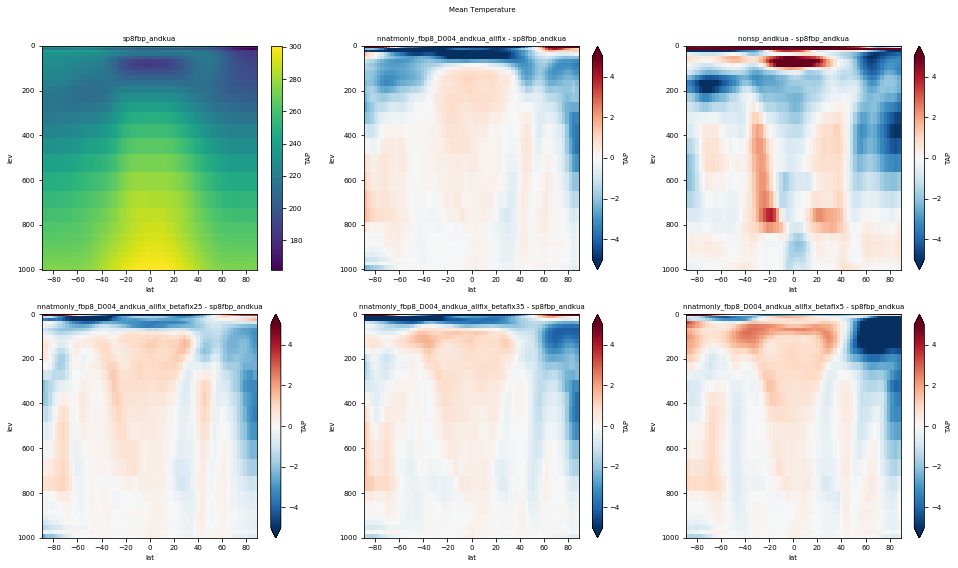

In [181]:
compare(lambda d: d['TAP'].sel(time=slice(30, None)).mean(('time', 'lon')), exps[1:], ref=exps_ak[0], 
        yincrease=False, vmin=-5, vmax=5, cmap='RdBu_r', title='Mean Temperature');

In [182]:
climate_error(lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
              lambda ref, d: np.fabs(ref['TAP'] - d['TAP']), 
              exps_ak[0], exps[1:])

[<xarray.DataArray ()>
 array(319.151939), <xarray.DataArray ()>
 array(422.455308), <xarray.DataArray ()>
 array(304.020299), <xarray.DataArray ()>
 array(289.481911), <xarray.DataArray ()>
 array(321.651559)]

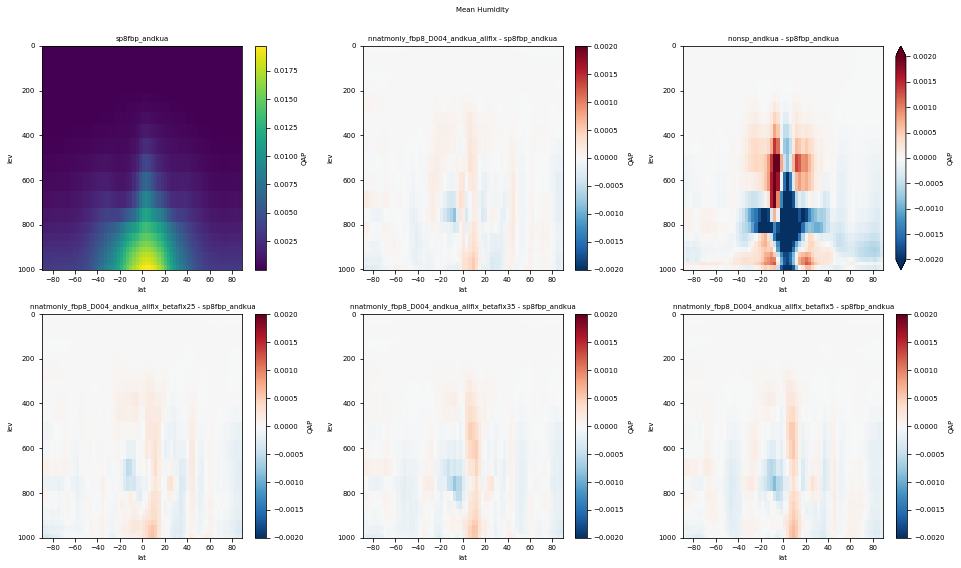

In [183]:
compare(lambda d: d['QAP'].sel(time=slice(30, None)).mean(('time', 'lon')), exps[1:], ref=exps_ak[0], 
        yincrease=False, vmin=-0.002, vmax=0.002, cmap='RdBu_r', title='Mean Humidity');

In [184]:
climate_error(lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
              lambda ref, d: np.fabs(ref['QAP'] - d['QAP']), 
              exps_ak[0], exps[1:])

[<xarray.DataArray ()>
 array(0.079558), <xarray.DataArray ()>
 array(0.143159), <xarray.DataArray ()>
 array(0.079454), <xarray.DataArray ()>
 array(0.077527), <xarray.DataArray ()>
 array(0.079926)]

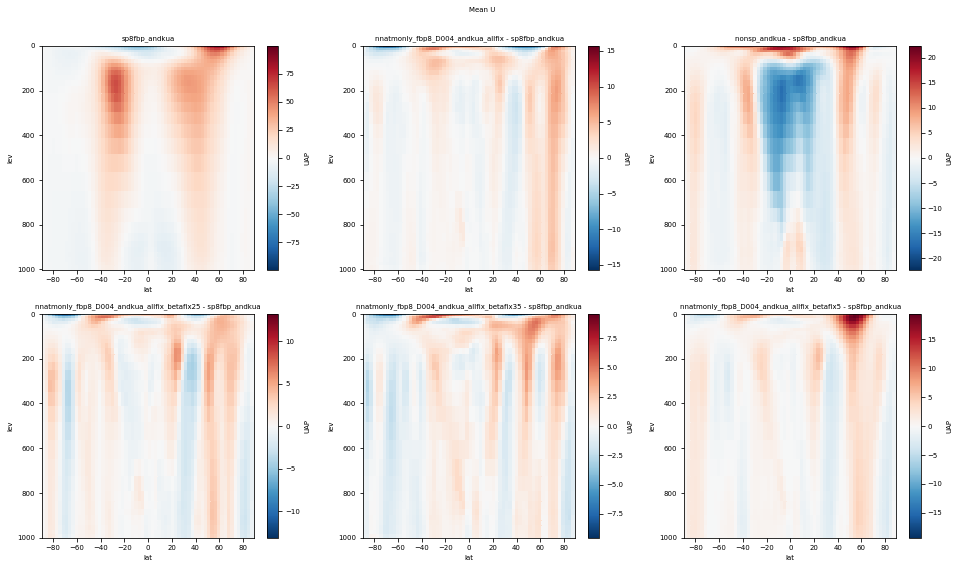

In [185]:
compare(lambda d: d['UAP'].sel(time=slice(30, None)).mean(('time', 'lon')), exps[1:], ref=exps_ak[0], 
        yincrease=False, cmap='RdBu_r', title='Mean U');

In [186]:
climate_error(lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
              lambda ref, d: np.fabs(ref['UAP'] - d['UAP']), 
              exps_ak[0], exps[1:])

[<xarray.DataArray ()>
 array(813.416393), <xarray.DataArray ()>
 array(1423.864879), <xarray.DataArray ()>
 array(845.151956), <xarray.DataArray ()>
 array(777.050156), <xarray.DataArray ()>
 array(813.427596)]

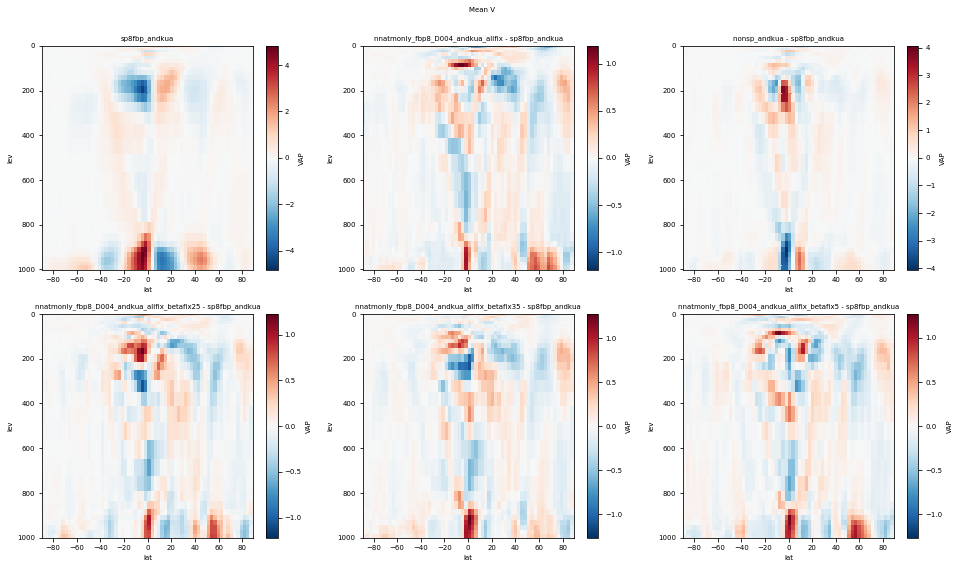

In [187]:
compare(lambda d: d['VAP'].sel(time=slice(30, None)).mean(('time', 'lon')), exps[1:], ref=exps_ak[0], 
        yincrease=False, cmap='RdBu_r', title='Mean V');

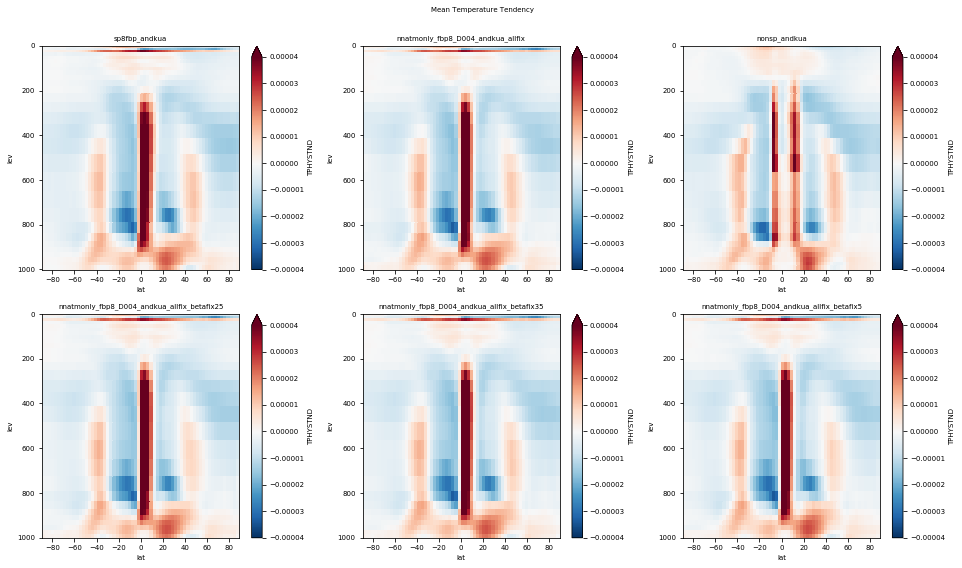

In [188]:
compare(lambda d: d['TPHYSTND'].sel(time=slice(30, None)).mean(('time', 'lon')), exps, 
        yincrease=False, vmin=-4e-5, vmax=4e-5, cmap='RdBu_r', title='Mean Temperature Tendency');

In [189]:
climate_error(lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
              lambda ref, d: np.fabs(ref['TPHYSTND'] - d['TPHYSTND']), 
              exps_ak[0], exps[1:])

[<xarray.DataArray ()>
 array(0.000756), <xarray.DataArray ()>
 array(0.002161), <xarray.DataArray ()>
 array(0.000771), <xarray.DataArray ()>
 array(0.000766), <xarray.DataArray ()>
 array(0.000832)]

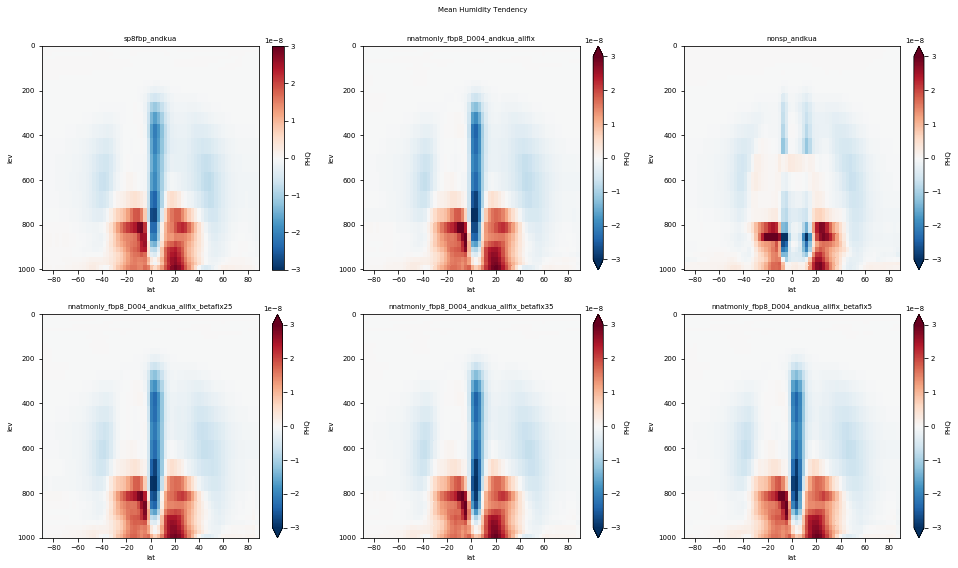

In [190]:
compare(lambda d: d['PHQ'].sel(time=slice(30, None)).mean(('time', 'lon')), exps, 
        yincrease=False, vmin=-3e-8, vmax=3e-8, cmap='RdBu_r', title='Mean Humidity Tendency');

In [191]:
climate_error(lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
              lambda ref, d: np.fabs(ref['PHQ'] - d['PHQ']), 
              exps_ak[0], exps[1:])

[<xarray.DataArray ()>
 array(3.019715e-07), <xarray.DataArray ()>
 array(9.569109e-07), <xarray.DataArray ()>
 array(3.086691e-07), <xarray.DataArray ()>
 array(3.102864e-07), <xarray.DataArray ()>
 array(3.312699e-07)]

### Final plots for paper

In [598]:
means = {v : [h0s[e][v].sel(time=slice(30, None)).isel(lev=slice(3,None)).mean(('time', 'lon')).compute() 
          for e in exps_ak] for v in ['TAP', 'QAP', 'VAP', 'UAP']}

In [636]:
save_tmp('means', means)

In [26]:
means = load_tmp('means')

In [24]:
means_nobeta = {v : [h0s[e][v].sel(time=slice(30, None)).isel(lev=slice(3,None)).mean(('time', 'lon')).compute() 
          for e in exps_ak_nobeta] for v in ['TAP', 'QAP', 'VAP', 'UAP']}

In [25]:
save_tmp('means_nobeta', means_nobeta)

In [34]:
# Gaussian latitudes
lats = h0s[exps_ak[0]].lat.values
gw = h0s[exps_ak[0]].gw.isel(time=0)
gwsum = np.cumsum(gw.values)
for m in means.values(): 
    for da in m: 
        da['lat'] = gwsum; da['lat'] = gwsum
for m in means_nobeta.values(): 
    for da in m: 
        da['lat'] = gwsum; da['lat'] = gwsum

In [28]:
label_lats = [-60, -30, 0, 30, 60]
gw_lats = [np.interp(l, lats, gwsum) for l in label_lats]

In [29]:
def mean_tq_panels(data, vmin=-5, vmax=5, cm1='plasma', cm2='RdBu_r', unit='Temperature [K]', 
                   contourf=False, levels1=None, levels2=None, clevels=None, clabel_locs=[], 
                   clabel_fmt='%.0f', clev_color='white'):
    fig, axs = plt.subplots(1, 3, figsize=(pagewidth, 3))
    if contourf:
        data[0].plot.contourf(ax=axs[0], yincrease=False, add_colorbar=False, cmap=cm1, levels=levels1)
        if clevels is not None:
            CS = data[0].plot.contour(ax=axs[0], yincrease=False, add_colorbar=False, levels=clevels, colors=clev_color,
                                      linewidths=1)
            plt.clabel(CS, fmt=clabel_fmt, manual=clabel_locs)
    else:
        data[0].plot(ax=axs[0], yincrease=False, add_colorbar=False, cmap=cm1)
    for ax, d in zip(axs.flat[1:], data[1:]):
        if contourf:
            im = (d - data[0]).plot.contourf(ax=ax, yincrease=False, add_colorbar=False,cmap=cm2, levels=levels2)
        else:
            im = (d - data[0]).plot(ax=ax, yincrease=False, add_colorbar=False, vmin=vmin, vmax=vmax, cmap=cm2)
        
    [ax.set_xticks(gw_lats) for ax in axs.flat]; [ax.set_xticklabels(label_lats) for ax in axs.flat]; 
    [ax.set_yticks([]) for ax in axs.flat[1:]]; [ax.set_ylabel('') for ax in axs.flat[1:]];
    axs[0].set_ylabel('Pressure [hPa]'); [ax.set_xlabel('Latitude') for ax in axs.flat]
    
    plt.subplots_adjust(wspace=0.03, left=0.1, right=1.0)
    cb = fig.colorbar(im, ax=axs.flat, pad=0.01, extend='both', use_gridspec=False); cb.set_label(unit)
    cb.formatter.set_powerlimits((1, 1)); cb.update_ticks()
    cb.ax.yaxis.set_offset_position('left')
    
    axs[0].set_title('SPCAM Temperature'); axs[1].set_title('NNCAM - SPCAM'); axs[2].set_title('CTRLCAM - SPCAM');
    return fig

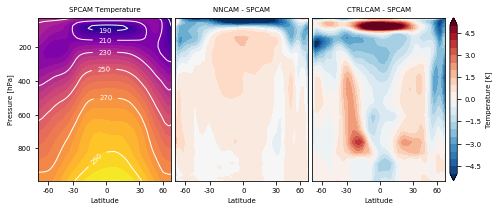

In [40]:
clabel_locs = [(1, 100), (1, 180), (1, 200), (1, 400), (1, 600), (1, 900)]
f = mean_tq_panels(means['TAP'], contourf=True, levels1=np.arange(180, 305, 5), levels2=np.arange(-5, 5.5, 0.5),
                   clevels=np.arange(190, 310, 20), clabel_locs=clabel_locs);

In [609]:
f.savefig(f'{FIG_DIR}mean_temperature.pdf')

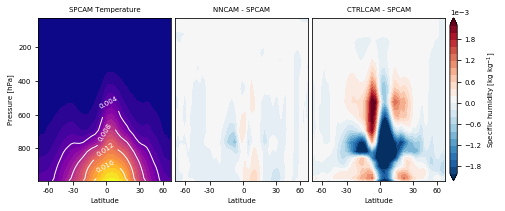

In [610]:
clabel_locs = [(1, 500), (1, 700), (1, 800), (1, 900)]
f = mean_tq_panels(
    means['QAP'], contourf=True, levels1=np.arange(0, 0.021, 0.001), levels2=np.arange(-0.002, 0.0022, 0.0002),
    unit=r'Specific humidity [kg kg$^{-1}$]', clevels=np.arange(0, 0.024, 0.004), clabel_locs=clabel_locs,
    clabel_fmt='%.3f');

In [611]:
f.savefig(f'{FIG_DIR}mean_humidity.pdf')

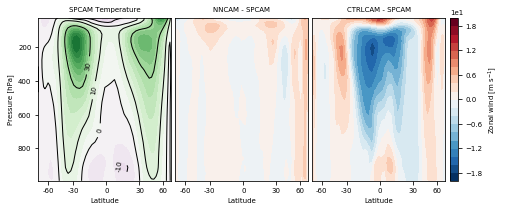

In [630]:
clabel_locs = [(1, 700), (0.75, 450), (0.6, 300), (1.2, 900)]
f = mean_tq_panels(
    means['UAP'], contourf=True, levels1=np.arange(-80, 85, 5), levels2=np.arange(-20, 22, 2),
    unit=r'Zonal wind [m s$^{-1}$]', clevels=[-10, 0, 10, 30], clabel_locs=clabel_locs,
    clabel_fmt='%.0f', cm1='PRGn', clev_color='k');

In [631]:
f.savefig(f'{FIG_DIR}mean_u.pdf')

In [327]:
def mean_tqphy_panels(data, unit='$\Delta$T$_{phys}$ [K s$^{-1}$]', contourf=False, **kwargs):
    fig, axs = plt.subplots(1, 3, figsize=(pagewidth, 3))
    for i, (ax, d) in enumerate(zip(axs.flat, data)):
        if contourf:
            im = d.plot.contourf(ax=ax, yincrease=False, add_colorbar=False, **kwargs)
        else:
            im = d.plot(ax=ax, yincrease=False, add_colorbar=False, **kwargs)
        
    [ax.set_xticks(gw_lats) for ax in axs.flat]; [ax.set_xticklabels(label_lats) for ax in axs.flat]; 
    [ax.set_yticks([]) for ax in axs.flat[1:]]; [ax.set_ylabel('') for ax in axs.flat[1:]];
    axs[0].set_ylabel('Pressure [hPa]'); [ax.set_xlabel('Latitude') for ax in axs.flat]
    
    plt.subplots_adjust(wspace=0.03, left=0.1, right=1.0)
    cb = fig.colorbar(im, ax=axs.flat, pad=0.01, extend='both', use_gridspec=False); cb.set_label(unit)
    cb.formatter.set_powerlimits((0, 0)); cb.update_ticks()
    cb.ax.yaxis.set_offset_position('left')
    
    axs[0].set_title('SPCAM'); axs[1].set_title('NNCAM'); axs[2].set_title('CTRLCAM');
    return fig

In [321]:
tphys = [h0s[e]['TPHYSTND'].sel(time=slice(30, None)).isel(lev=slice(3,None)).mean(('time', 'lon')).compute() 
         for e in exps_ak]
phqs = [h0s[e]['PHQ'].sel(time=slice(30, None)).isel(lev=slice(3,None)).mean(('time', 'lon')).compute() 
         for e in exps_ak]

In [322]:
for t, q in zip(tphys, phqs): t['lat'] = gwsum; q['lat'] = gwsum

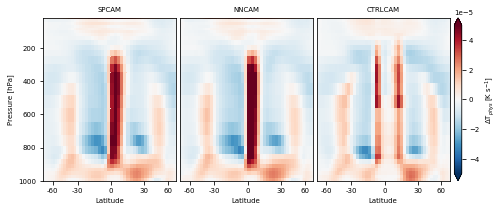

In [328]:
f = mean_tqphy_panels(tphys, vmin=-5e-5, vmax=5e-5, cmap='RdBu_r')

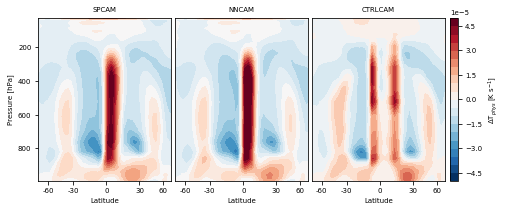

In [329]:
f = mean_tqphy_panels(tphys, contourf=True, cmap='RdBu_r', levels=np.arange(-5e-5, 5.5e-5, 5e-6))

In [330]:
f.savefig(f'{FIG_DIR}mean_tphys.pdf')

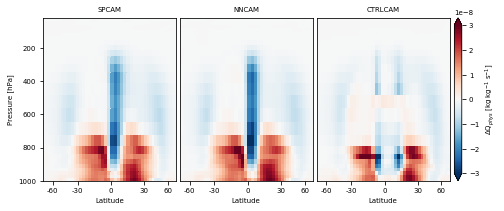

In [335]:
f = mean_tqphy_panels(phqs, vmin=-3e-8, vmax=3e-8, cmap='RdBu_r', unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')

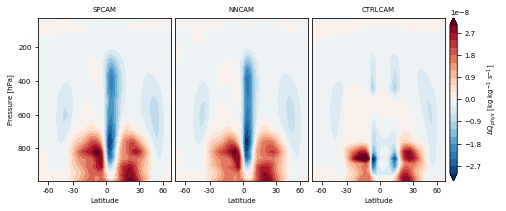

In [336]:
f = mean_tqphy_panels(phqs, contourf=True, cmap='RdBu_r', levels=np.arange(-3e-8, 3.3e-8, 3e-9),
                      unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')

In [337]:
f.savefig(f'{FIG_DIR}mean_phq.pdf')

## Variability

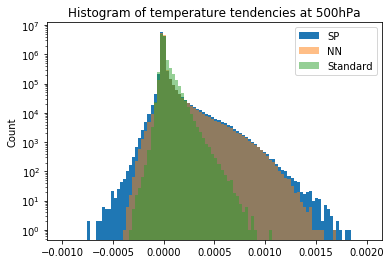

In [44]:
[h1s[e]['TPHYSTND'].sel(time=slice(30, None)).sel(lev=500, method='nearest').plot(
    range=(-1e-3, 2e-3), bins=100, label=e, alpha=1. if i==0 else 0.5) 
 for i, e in enumerate(exps_ak)];
plt.legend(['SP', 'NN', 'Standard']); plt.yscale('log')
plt.title('Histogram of temperature tendencies at 500hPa');

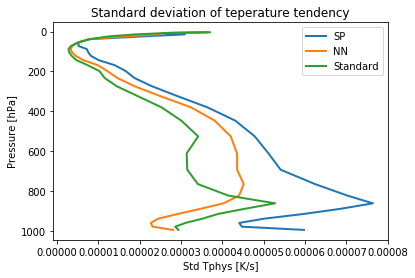

In [19]:
[plt.plot(h1s[e]['TPHYSTND'].sel(time=slice(30, None)).std(('time', 'lon')).mean('lat'), h1s[e].lev, label=e, lw=2)
 for i, e in enumerate(exps_ak)];
plt.legend(['SP', 'NN', 'Standard']); plt.gca().invert_yaxis()
plt.title('Standard deviation of teperature tendency'); plt.ylabel('Pressure [hPa]'); plt.xlabel('Std Tphys [K/s]');

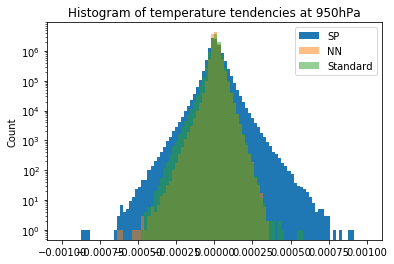

In [45]:
[h1s[e]['TPHYSTND'].sel(time=slice(30, None)).sel(lev=950, method='nearest').plot(
    range=(-1e-3, 1e-3), bins=100, label=e, alpha=1. if i==0 else 0.5) 
 for i, e in enumerate(exps_ak)];
plt.legend(['SP', 'NN', 'Standard']); plt.yscale('log')
plt.title('Histogram of temperature tendencies at 950hPa');

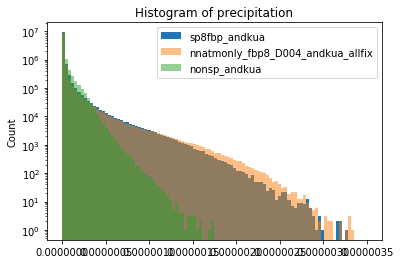

In [41]:
[h1s[e]['PRECT'].sel(time=slice(30, None)).plot(
    range=(0, 3.5e-6), bins=100, label=e, alpha=1. if i==0 else 0.5) 
 for i, e in enumerate(exps_ak)];
plt.legend(); plt.yscale('log')
plt.title('Histogram of precipitation');

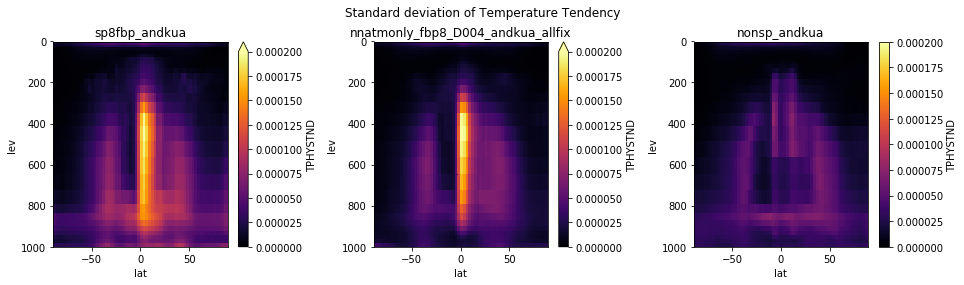

In [57]:
compare(lambda d: d['TPHYSTND'].sel(time=slice(30, 90)).std(('time', 'lon')), exps_ak, hs=h1s,
        yincrease=False, vmin=0, vmax=2e-4, cmap='inferno', title='Standard deviation of Temperature Tendency');

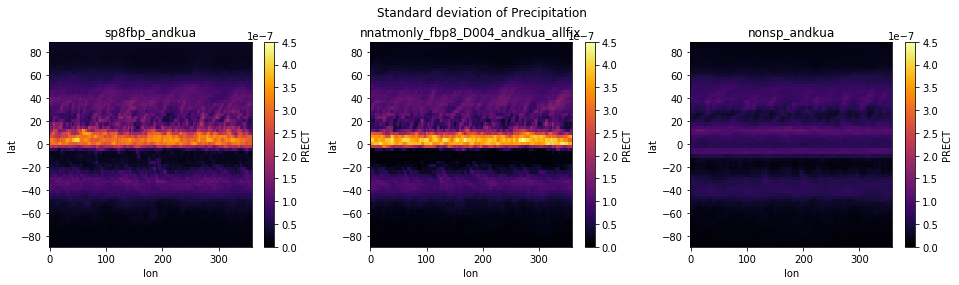

In [54]:
compare(lambda d: d['PRECT'].sel(time=slice(30, None)).std(('time')), exps_ak, hs=h1s,
        vmin=0, vmax=4.5e-7, cmap='inferno', title='Standard deviation of Precipitation');

### Plot for paper

In [645]:
stds = {v: [h1s[e][v].sel(time=slice(30, None, 12)).isel(lev=slice(3, None)).std(('time', 'lon')).mean('lat').compute()
        for i, e in enumerate(exps_ak)] for v in ['TPHYSTND', 'PHQ']};

In [646]:
save_tmp('stds', stds)

In [361]:
levs = h1s[exps_ak[0]].lev[3:].values

In [651]:
def std_panel(stds, xlabel, xlims):
    colors = ['dodgerblue', 'firebrick', 'darkgreen']
    fig, ax = plt.subplots(figsize=(pagewidth/2, 3))
    plt.subplots_adjust(left=0.2, right=0.9)
    [plt.plot(stds[i], levs, label=e, c=colors[i], lw=2) for i, e in enumerate(['SPCAM', 'NNCAM', 'CTRLCAM'])]
    ax.legend()
    sns.despine()
    ax.set_xlabel(xlabel); ax.set_ylabel(r'Pressure [hPa]')
    ax.ticklabel_format(axis='x', scilimits=(0, 0))
    ax.set_ylim(0, 1000); ax.set_xlim(xlims)
    ax.invert_yaxis()
    return fig

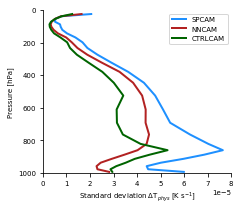

In [652]:
f = std_panel(stds['TPHYSTND'], r'Standard deviation $\Delta$T$_{phys}$ [K s$^{-1}$]', (0, 0.8e-4))

In [653]:
f.savefig(f'{FIG_DIR}std_tphys.pdf')

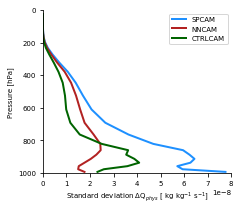

In [654]:
f = std_panel(stds['PHQ'], r'Standard deviation $\Delta$Q$_{phys}$ [ kg kg$^{-1}$ s$^{-1}$]', (0, 0.8e-7))

In [655]:
f.savefig(f'{FIG_DIR}std_phq.pdf')

In [360]:
prects = [h1s[e]['PRECT'].sel(time=slice(30, None)).plot(range=(0, 3.5e-6), bins=100, label=e) 
          for i, e in enumerate(exps_ak)];
plt.close('all')

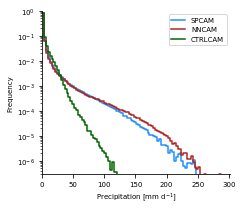

In [367]:
fig, ax = plt.subplots(figsize=(pagewidth/2, 3))
plt.subplots_adjust(left=0.2, right=0.9)
[ax.step(prects[i][1][:-1]*1e3*24*3600, prects[i][0]/prects[i][0].sum(), label=e, c=colors[i], where='post') 
 for i, e in enumerate(['SPCAM', 'NNCAM', 'CTRLCAM'])]
ax.set_yscale('log')
ax.legend()
sns.despine()
ax.set_xlabel(r'Precipitation [mm d$^{-1}$]'); ax.set_ylabel(r'Frequency')
#ax.set_title('Precipitation distribution')
#ax.ticklabel_format(axis='x', scilimits=(0, 0))
ax.set_ylim(3e-7, 1); 
ax.set_xlim(0, prects[0][1][-1]*1e3*24*3600);

In [368]:
fig.savefig(f'{FIG_DIR}prec_hist.pdf')

In [656]:
stds2d = {v: [h1s[e][v].sel(time=slice(30, None, 12)).isel(lev=slice(3, None)).std(('time')).mean('lon').compute()
          for i, e in enumerate(exps_ak)] for v in ['TPHYSTND', 'PHQ']};

In [657]:
save_tmp('stds2d', stds2d)

In [658]:
for m in stds2d.values(): 
    for da in m: 
        da['lat'] = gwsum; da['lat'] = gwsum

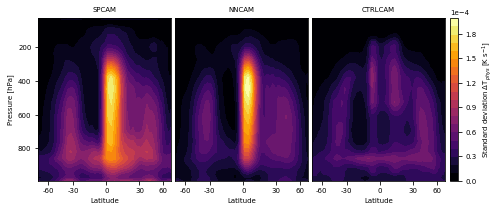

In [670]:
f = mean_tqphy_panels(stds2d['TPHYSTND'], contourf=True, cmap='inferno', levels=np.arange(0, 2.1e-4, 1e-5),
                      unit='Standard deviation $\Delta$T$_{phys}$ [K s$^{-1}$]')

In [671]:
f.savefig(f'{FIG_DIR}std2d_tphy.pdf')

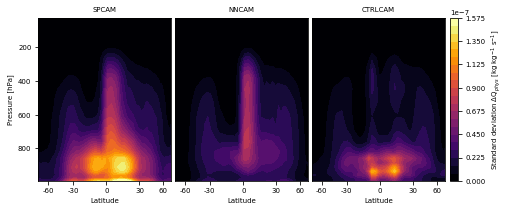

In [672]:
f = mean_tqphy_panels(stds2d['PHQ'], contourf=True, cmap='inferno', levels=np.arange(0, 1.575e-7, 0.75e-8),
                      unit='Standard deviation $\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')

In [673]:
f.savefig(f'{FIG_DIR}std2d_phq.pdf')

In [707]:
snap2d = {v: [h1s[e][v].isel(time=50, lon=75).isel(lev=slice(3, None)).compute()
          for i, e in enumerate(exps_ak)] for v in ['TPHYSTND', 'PHQ']};

In [708]:
for m in snap2d.values(): 
    for da in m: 
        da['lat'] = gwsum; da['lat'] = gwsum

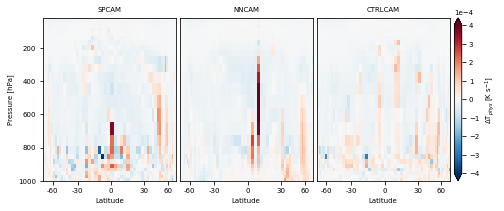

In [709]:
f = mean_tqphy_panels(snap2d['TPHYSTND'], cmap='RdBu_r', vmin=-4e-4, vmax=4e-4)

In [710]:
f.savefig(f'{FIG_DIR}snap2d_tphy.pdf')

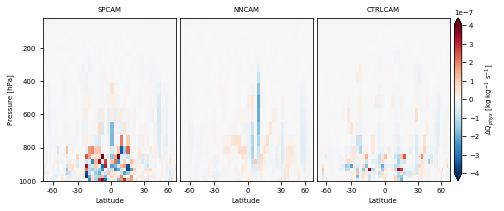

In [712]:
f = mean_tqphy_panels(snap2d['PHQ'], cmap='RdBu_r', vmin=-4e-7, vmax=4e-7, 
                      unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')

In [713]:
f.savefig(f'{FIG_DIR}snap2d_phq.pdf')

## Generalization to new SSTs

In [382]:
for d in h0s.values(): 
    d['vTAP'] = vint(d, 'TAP', C_P); d['vQAP'] = vint(d, 'QAP', L_V)
    d['vTPHY'] = vint(d, 'TPHYSTND', C_P); d['vPHQ'] = vint(d, 'PHQ', L_V)

### 3KW1

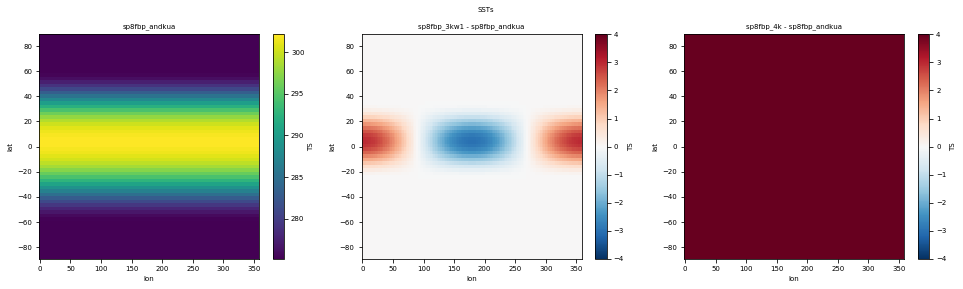

In [380]:
compare(lambda d: d['TS'].isel(time=0), [exps_3kw1[0], exps_4k[0]], ref=exps_ak[0],
        title='SSTs', vmin=-4, vmax=4, cmap='RdBu_r');

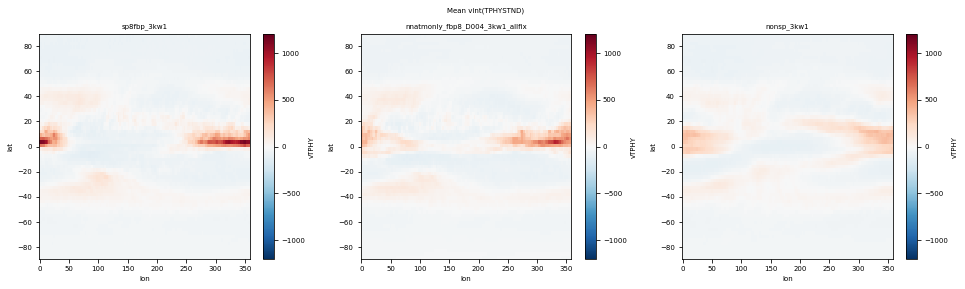

In [383]:
compare(lambda d: d['vTPHY'].sel(time=slice(30, None)).mean(('time')), exps_3kw1,
        vmin=-1200, vmax=1200, cmap='RdBu_r', title='Mean vint(TPHYSTND)');

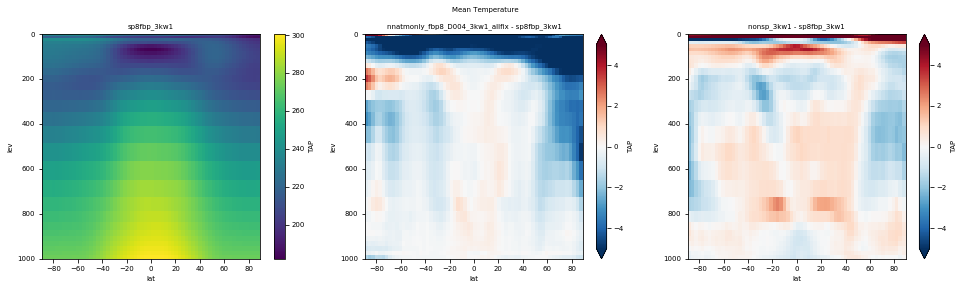

In [386]:
compare(lambda d: d['TAP'].sel(time=slice(30, None)).mean(('time', 'lon')), exps_3kw1[1:], ref=exps_3kw1[0], 
        yincrease=False, vmin=-5, vmax=5, cmap='RdBu_r', title='Mean Temperature');

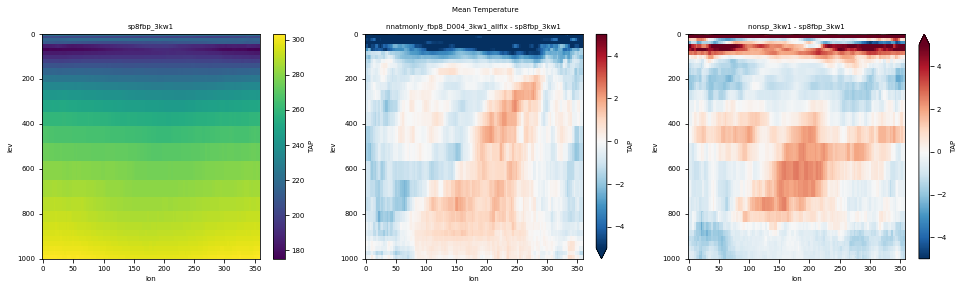

In [388]:
compare(lambda d: d['TAP'].sel(time=slice(30, None)).sel(lat=0, method='nearest').mean(('time')), exps_3kw1[1:], ref=exps_3kw1[0], 
        yincrease=False, vmin=-5, vmax=5, cmap='RdBu_r', title='Mean Temperature');

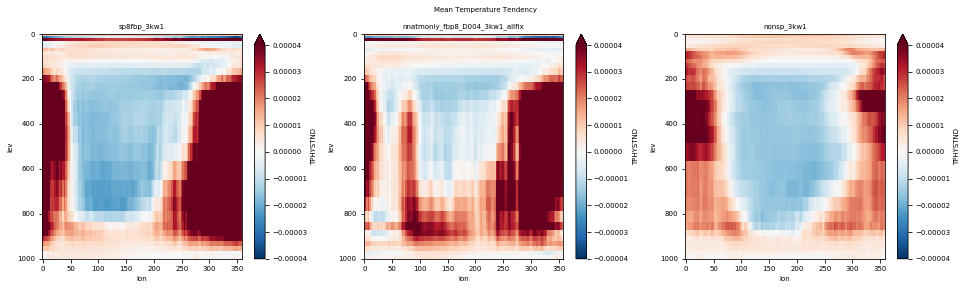

In [390]:
compare(lambda d: d['TPHYSTND'].sel(time=slice(30, None)).sel(lat=0, method='nearest').mean(('time')), exps_3kw1, 
        yincrease=False, vmin=-4e-5, vmax=4e-5, cmap='RdBu_r', title='Mean Temperature Tendency');

### +4K

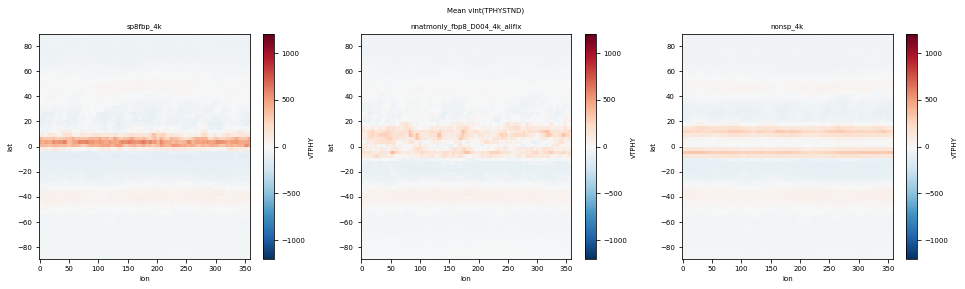

In [384]:
compare(lambda d: d['vTPHY'].sel(time=slice(30, None)).mean(('time')), exps_4k,
        vmin=-1200, vmax=1200, cmap='RdBu_r', title='Mean vint(TPHYSTND)');

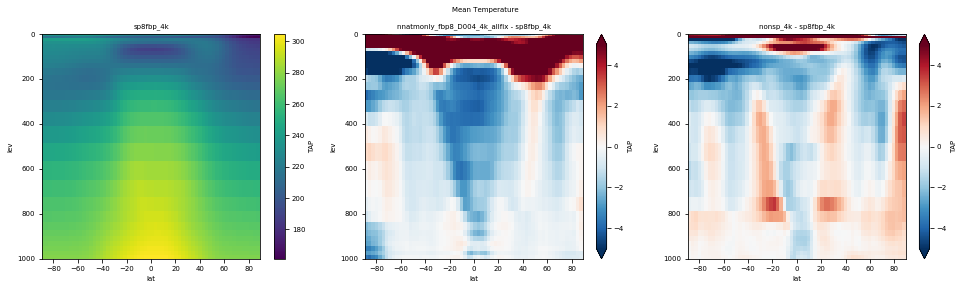

In [385]:
compare(lambda d: d['TAP'].sel(time=slice(30, None)).mean(('time', 'lon')), exps_4k[1:], ref=exps_4k[0], 
        yincrease=False, vmin=-5, vmax=5, cmap='RdBu_r', title='Mean Temperature');

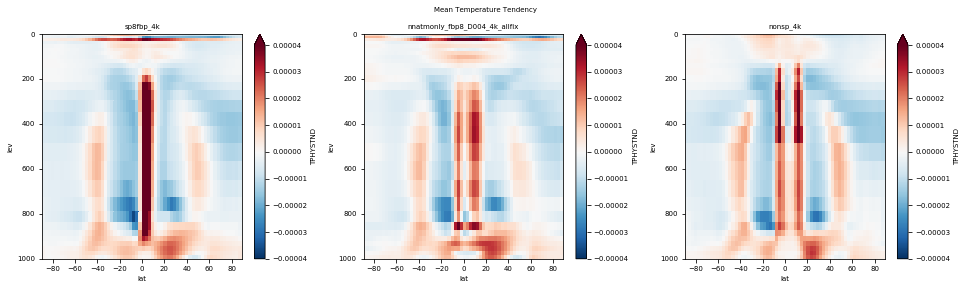

In [389]:
compare(lambda d: d['TPHYSTND'].sel(time=slice(30, None)).mean(('time', 'lon')), exps_4k, 
        yincrease=False, vmin=-4e-5, vmax=4e-5, cmap='RdBu_r', title='Mean Temperature Tendency');

### Climate error

## Energy conservation

In [443]:
d = h1s['nnatmonly_fbp8_D004_andkua_allfix']

In [444]:
NNQatm = vint(d, 'NNDQ', 1)
PPQatm = vint(d, 'PPDQ', 1)

In [445]:
NNQsurf = d['NNLHF'] / L_V - d['NNPRECT'] * 1e3
PPQsurf = d['NNLHF'] / L_V - d['PPPRECT'] * 1e3

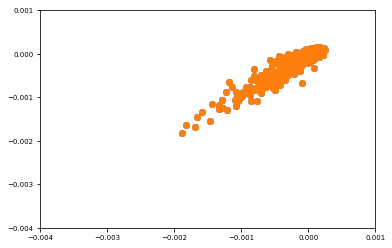

In [435]:
plt.scatter(NNQatm.isel(time=100).values.flat, NNQsurf.isel(time=100).values.flat)
plt.scatter(PPQatm.isel(time=100).values.flat, PPQsurf.isel(time=100).values.flat)
plt.xlim(-4e-3, 1e-3); plt.ylim(-4e-3, 1e-3);

In [446]:
NNSE = vint(d, 'NNDT', C_P) - d['NNSHF'] - d['NNFSNT'] + d['NNFSNS'] + d['NNFLNT'] - d['NNFLNS']
PPSE = vint(d, 'PPDT', C_P) - d['NNSHF'] - d['PPFSNT'] + d['PPFSNS'] + d['PPFLNT'] - d['PPFLNS']

In [447]:
NNME = d['NNLHF'] - vint(d, 'NNDQ', L_V)
PPME = d['NNLHF'] - vint(d, 'PPDQ', L_V)

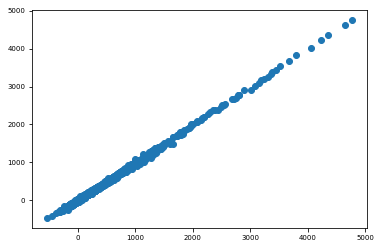

In [438]:
plt.scatter(NNSE.isel(time=100).values.flat, NNME.isel(time=100).values.flat)
#plt.scatter(PPSE.isel(time=100).values.flat, PPME.isel(time=100).values.flat)

In [513]:
dH001 = xr.open_mfdataset(f'{DATA_DIR}nnatmonly_fbp8_H001_andkua_allfix/*.h0.000*-*', decode_times=False)

In [514]:
dH001

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 15)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 31.0 59.0 90.0 120.0 151.0 181.0 212.0 ...
Dimensions wit

In [88]:
d_long = xr.open_mfdataset(f'{DATA_DIR}nnatmonly_fbp8_D004_andkua_allfix/*.h0.000*-*', decode_times=False)

In [90]:
h0s['nnatmonly_fbp8_D004_andkua_allfix_long'] = d_long

In [515]:
h0s['H001'] = dH001

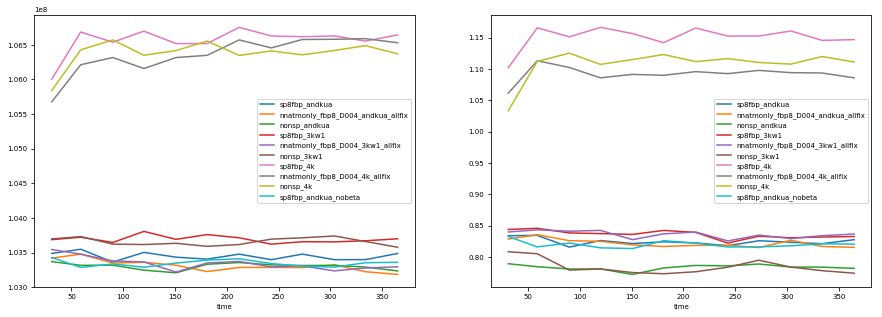

In [391]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
compare_line(lambda d: gw_avg(d, 'TE'), exps + ['sp8fbp_andkua_nobeta'], ax=axs[0])
compare_line(lambda d: gw_avg(d, 'TW'), exps + ['sp8fbp_andkua_nobeta'], ax=axs[1])

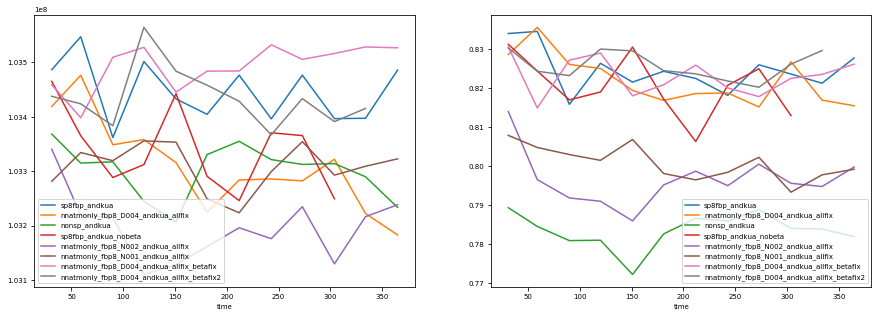

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
compare_line(lambda d: gw_avg(d, 'TE'), exps_ak + exps_ak_nobeta +
             ['nnatmonly_fbp8_D004_andkua_allfix_betafix', 'nnatmonly_fbp8_D004_andkua_allfix_betafix2'], ax=axs[0])
compare_line(lambda d: gw_avg(d, 'TW'), exps_ak + exps_ak_nobeta + 
             ['nnatmonly_fbp8_D004_andkua_allfix_betafix', 'nnatmonly_fbp8_D004_andkua_allfix_betafix2'], ax=axs[1])

### Plots for paper

In [448]:
NNSE

<xarray.DataArray (time: 1480, lat: 64, lon: 128)>
dask.array<shape=(1480, 64, 128), dtype=float64, chunksize=(40, 64, 128)>
Coordinates:
  * time     (time) float64 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 2.25 2.5 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...

In [450]:
a = NNSE.isel(time=slice(0, None, 200)).values.flat
b = NNME.isel(time=slice(0, None, 200)).values.flat

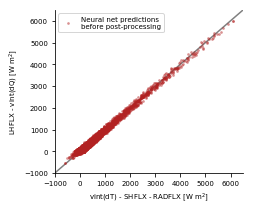

In [458]:
fig, ax = plt.subplots(figsize=(pagewidth/2, 3))
plt.subplots_adjust(left=0.2, right=0.9)
ax.scatter(a, b, alpha=0.5, s=7, color='firebrick', linewidths=0, label='Neural net predictions\nbefore post-processing')
sns.despine()
ax.legend()
ax.set_xlabel(r'vint(dT) - SHFLX - RADFLX [W m$^{2}$]'); ax.set_ylabel(r'LHFLX - vint(dQ) [W m$^{2}$]')
#ax.set_title('Heating rate variability')
#ax.ticklabel_format(axis='x', scilimits=(0, 0))
ax.set_ylim(-1e3, 6.5e3); ax.set_xlim(-1e3, 6.5e3)
ax.plot([-1e3, 6.5e3], [-1e3, 6.5e3], zorder=0.1, c='gray');

In [459]:
fig.savefig(f'{FIG_DIR}engy_scatter.pdf')

## W-K diagram

In [393]:
WK_DATA = '/beegfs/DATA/pritchard/srasp/wkdata/'
!ls {WK_DATA}

scratch
SpaceTime.PRECT.nnatmonly_fbp8_D004_3kw1_allfix.nc
SpaceTime.PRECT.nnatmonly_fbp8_D004_4k_allfix.nc
SpaceTime.PRECT.nnatmonly_fbp8_D004_andkua_allfix.nc
SpaceTime.PRECT.nonsp_3kw1.nc
SpaceTime.PRECT.nonsp_4k.nc
SpaceTime.PRECT.nonsp_andkua.nc
SpaceTime.PRECT.sp8fbp_3kw1.nc
SpaceTime.PRECT.sp8fbp_4k.nc
SpaceTime.PRECT.sp8fbp_andkua.nc


In [394]:
exps

['sp8fbp_andkua',
 'nnatmonly_fbp8_D004_andkua_allfix',
 'nonsp_andkua',
 'sp8fbp_3kw1',
 'nnatmonly_fbp8_D004_3kw1_allfix',
 'nonsp_3kw1',
 'sp8fbp_4k',
 'nnatmonly_fbp8_D004_4k_allfix',
 'nonsp_4k']

In [395]:
wks = [xr.open_dataset(f'{WK_DATA}SpaceTime.PRECT.{e}.nc') for e in exps]

In [396]:
wks = [wk.isel(freq=slice(1, None)) for wk in wks]

In [397]:
freq_days = 1/wks[0].freq

In [398]:
labels_days = [30, 6, 3, 2]
labels_freq = 1/np.array(labels_days)

In [399]:
hs = [12, 25, 50]
g = 9.81

In [400]:
def ER(k, h):
    n = 1; lat = 0.
    Beta = 2. * 7.292E-5 * np.cos(abs(lat)) / 6.37E6
    t4 = (Beta / np.ma.sqrt(g * h)) * (2 * n + 1.)
    return -Beta * k / (k * k + t4)

In [401]:
lat = 0.
ll = 2. * np.pi * 6.37E6 * np.cos(abs(lat))

In [402]:
k = 2 * np.pi * wk.wave / ll

In [403]:
def tofreq(x): return 1/(2 * np.pi / (x * 24 * 60 * 60))

In [506]:
def wk_panel(ax, data, title, add_text=True, **kwargs):
    im = ax.contourf(data.wave, data.freq, data['FIG_3_SYM'], **kwargs)
    ax.set_yticks(labels_freq); ax.set_yticklabels(labels_days);
    [ax.axhline(y, linestyle='--', c='gray', zorder=1.1, linewidth=0.75) for y in labels_freq]
    [ax.plot(wk.wave, tofreq(k*np.sqrt(g * h)), c='gray', lw=0.7) for h in hs];
    [ax.plot(wk.wave, tofreq(ER(k, h)), c='gray', lw=0.7) for h in hs];
    ax.set_xlim(wk.wave[0], wk.wave[-1]); ax.set_ylim(wk.freq[0], wk.freq[-1]);
    if add_text:
        ax.text(8, 1/2.4, 'Kelvin', color='white', weight='bold', fontsize=8, zorder=2);
        ax.text(-14, 1/15, 'n=1 ER', color='white', weight='bold', fontsize=8, zorder=2);
        ax.text(4, 1/28, 'MJO', color='white', weight='bold', fontsize=8, zorder=2);
    ax.set_xlabel('Zonal wave number'); ax.set_ylabel('Period [days]')
    ax.set_title(title, fontsize=10)
    ax.set_xticks([-10, -5, 0, 5, 10])
    return im

In [507]:
titles = ['SPCAM', 'NNCAM', 'CTRLCAM']

In [508]:
def wk_panels(data):
    fig, axs = plt.subplots(1, 3, figsize=(pagewidth, 3))
    for i, (ax, wk) in enumerate(zip(axs.flat, data)):
        im = wk_panel(ax, wk, titles[i], True if i == 0 else False, cmap='plasma', 
                      levels=np.arange(1, 2.1, 0.1), extend='both')
        if i > 0: ax.set_ylabel(''); ax.set_yticks([])
    plt.subplots_adjust(wspace=0.03, left=0.1, right=1.0)
    cb = fig.colorbar(im, ax=axs, pad=0.01); cb.set_label('Log power spectrum')
    return fig

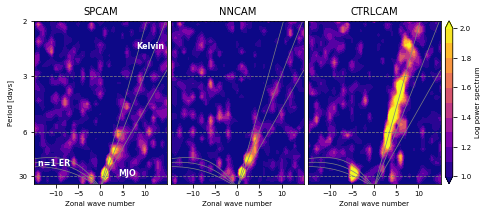

In [509]:
f = wk_panels(wks[:3])

In [510]:
f.savefig(f'{FIG_DIR}wk.pdf')

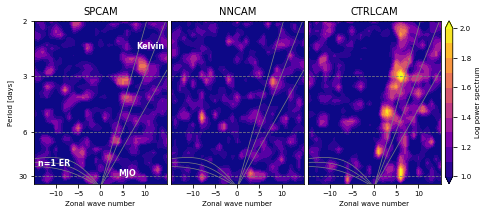

In [511]:
f = wk_panels(wks[3:6])

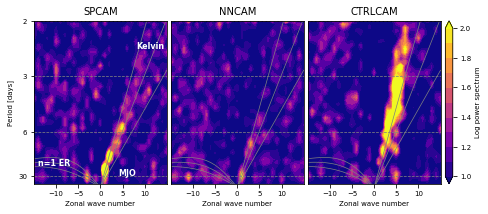

In [512]:
f = wk_panels(wks[6:])